# Taller 3 Visualización

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset simulado
data = r"global_smartphone_shipments.csv"

df = pd.read_csv(data)
df.head()

,Company,Region,Shipments_Millions
0,Samsung,North America,45
1,Samsung,Europe,65
2,Samsung,Asia,180
3,Apple,North America,70
4,Apple,Europe,60


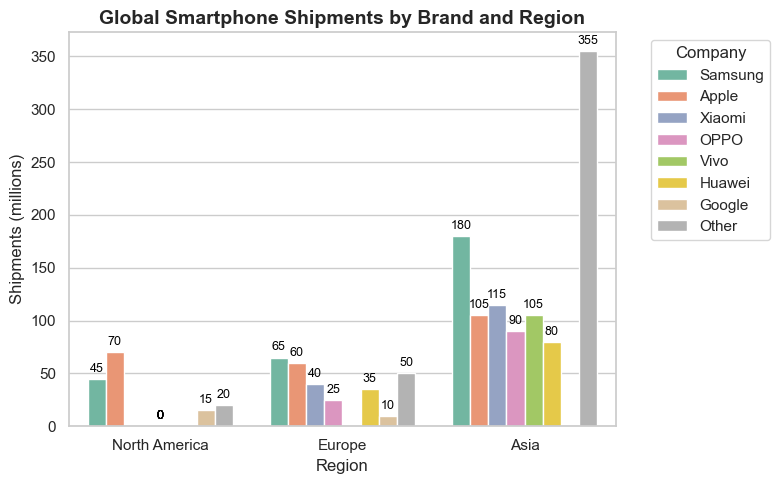

In [11]:
#Punto 1:Comparar ventas totales y proporciones entre marcas o regiones. Diagramna de barras agrupadas

# Configuración estética global
sns.set_theme(style="whitegrid")  # whitegrid = limpio y profesional
palette = sns.color_palette("Set2")  # paleta moderna

# ==== 1. Gráfico de barras agrupadas ====
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x="Region", y="Shipments_Millions", hue="Company", palette=palette)

# Etiquetas sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title("Global Smartphone Shipments by Brand and Region", fontsize=14, weight="bold")
plt.ylabel("Shipments (millions)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


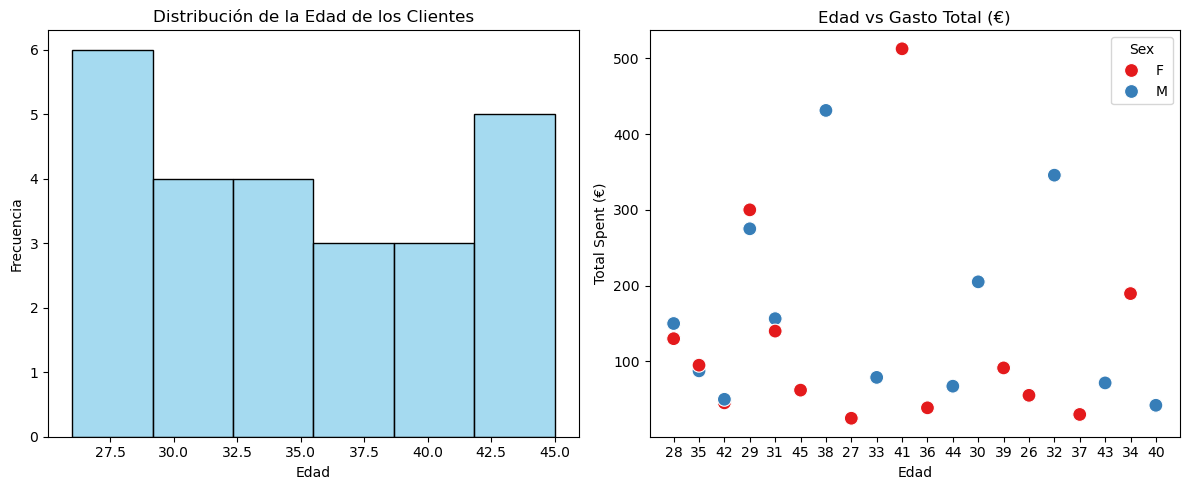

C:\Users\jespi\AppData\Local\Temp\ipykernel_6116\2865420682.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


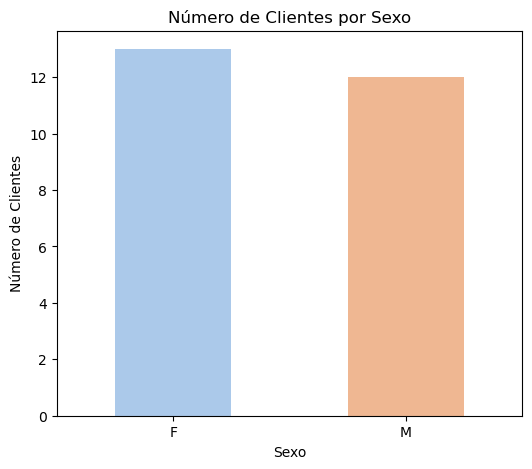

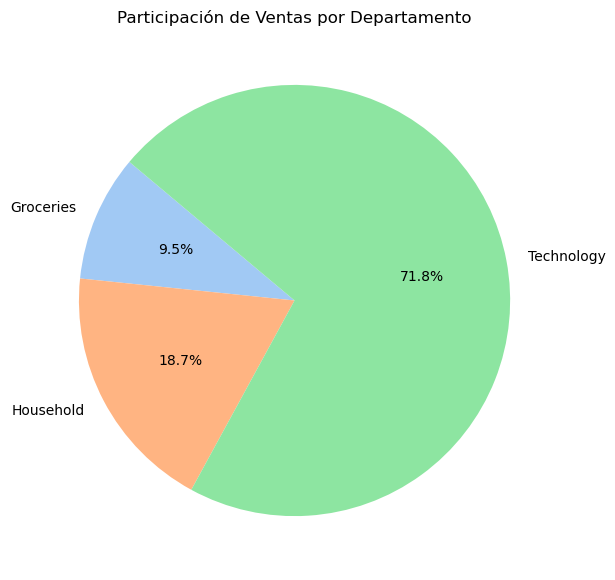

In [11]:
#Punto 2 Customer spending data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset

df = pd.read_csv(r"customer_spending_data.csv")

# 1. Caracterización por edad y gasto

plt.figure(figsize=(12,5))

# Histograma de edades
plt.subplot(1,2,1)
sns.histplot(df["Age"], bins=6, color="skyblue")
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Dispersión Edad vs Gasto
plt.subplot(1,2,2)
sns.scatterplot(data=df,  x=df["Age"].astype(str), y="Total_Spent_EUR", hue="Sex", palette="Set1", s=100)
plt.title("Edad vs Gasto Total (€)")
plt.xlabel("Edad")
plt.ylabel("Total Spent (€)")

plt.tight_layout()
plt.show()


# 2. Número de clientes por sexo

plt.figure(figsize=(6,5))
ax = sns.countplot(
    data=df, 
    x="Sex", 
    palette="pastel", 
    width=0.5 
)

plt.title("Número de Clientes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de Clientes")
plt.show()



# 3. Total de ventas por departamento

dept_sales = df.groupby("Department")["Total_Spent_EUR"].sum()

plt.figure(figsize=(7,7))
plt.pie(dept_sales, labels=dept_sales.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Participación de Ventas por Departamento")
plt.show()
